In [1]:
import  os

folder           =  r'Output_20220901092149AM'
os.chdir(folder)
filename         =  'imputed_compact_dataset_10_20220901092150AM.csv'

In [2]:
import time
from    datetime   import datetime
from    datetime   import timedelta

In [3]:
import   pandas                   as      pd
import   numpy                    as      np
from     sklearn                  import  metrics
from     sklearn.metrics          import  classification_report
from     sklearn.model_selection  import  train_test_split
import   matplotlib.pyplot        as      plt
import   statsmodels.api          as      sm

In [4]:
### -------------------------------------------------------------------------
from    sklearn.tree                   import   DecisionTreeClassifier
from    sklearn.ensemble               import   RandomForestClassifier
from    xgboost                        import   XGBClassifier
### -------------------------------------------------------------------------
from    sklearn.metrics          import  accuracy_score, roc_auc_score
from    scipy.stats              import  mode

In [5]:
df             =    pd.read_csv(filename)
print('Data shape {}'.format(df.shape))

Data shape (9000, 12)


In [6]:
df['Shareholderquity_code']   =  df['Shareholderquity_code'].astype(str)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Cash_ratio                      9000 non-null   float64
 1   Changeinsales_Industry          9000 non-null   float64
 2   debt_equity                     9000 non-null   float64
 3   debt_income                     9000 non-null   float64
 4   Interest_coverage               9000 non-null   float64
 5   Operating Cash Flow/Total Debt  9000 non-null   float64
 6   Receivable_turnover(new)        9000 non-null   float64
 7   ROS(new)                        9000 non-null   float64
 8   Total shareholders' funds       9000 non-null   float64
 9   Slno                            9000 non-null   int64  
 10  Shareholderquity_code           9000 non-null   object 
 11  Target                          9000 non-null   int64  
dtypes: float64(9), int64(2), object(1)

In [8]:
df['Shareholderquity_code'].value_counts()   

0.0    7035
2.0     896
1.0     619
3.0     450
Name: Shareholderquity_code, dtype: int64

In [9]:
rcols  =  df.columns.tolist()

In [10]:
df.isnull().sum()

Cash_ratio                        0
Changeinsales_Industry            0
debt_equity                       0
debt_income                       0
Interest_coverage                 0
Operating Cash Flow/Total Debt    0
Receivable_turnover(new)          0
ROS(new)                          0
Total shareholders' funds         0
Slno                              0
Shareholderquity_code             0
Target                            0
dtype: int64

In [11]:
y                    =    df['Target']
X                    =    df.drop(['Target'], axis = 1)
random_state         =    12345

In [12]:
 X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.30, stratify = y,  random_state = random_state)  

In [13]:
print(X_train.columns)

Index(['Cash_ratio', 'Changeinsales_Industry', 'debt_equity', 'debt_income',
       'Interest_coverage', 'Operating Cash Flow/Total Debt',
       'Receivable_turnover(new)', 'ROS(new)', 'Total shareholders' funds',
       'Slno', 'Shareholderquity_code'],
      dtype='object')


In [14]:
print(X_test.columns)

Index(['Cash_ratio', 'Changeinsales_Industry', 'debt_equity', 'debt_income',
       'Interest_coverage', 'Operating Cash Flow/Total Debt',
       'Receivable_turnover(new)', 'ROS(new)', 'Total shareholders' funds',
       'Slno', 'Shareholderquity_code'],
      dtype='object')


In [15]:
print(y_train.head())

3654    0
3171    0
4669    0
8936    1
447     0
Name: Target, dtype: int64


In [16]:
print(y_test.head())

7989    1
8659    1
3809    0
2250    0
5337    0
Name: Target, dtype: int64


In [17]:
rcols =  X_train.columns.tolist(); type(rcols)

list

In [18]:
rcols

['Cash_ratio',
 'Changeinsales_Industry',
 'debt_equity',
 'debt_income',
 'Interest_coverage',
 'Operating Cash Flow/Total Debt',
 'Receivable_turnover(new)',
 'ROS(new)',
 "Total shareholders' funds",
 'Slno',
 'Shareholderquity_code']

In [19]:
##rcols           =  ['Cash_ratio', 'Changeinsales_Industry', 'Quick_ratio', 'ROS(new)','Sales_CE', "Total shareholders' funds",\
##                    'debt_equity']

del rcols[-2:]
print(rcols)

['Cash_ratio', 'Changeinsales_Industry', 'debt_equity', 'debt_income', 'Interest_coverage', 'Operating Cash Flow/Total Debt', 'Receivable_turnover(new)', 'ROS(new)', "Total shareholders' funds"]


In [20]:
X_train_        =  X_train[rcols]

In [21]:
X_test_         =   X_test[rcols]

### Creating the classifier object for DecisionTree Model

In [22]:
# Creating the classifier object
clf_gini = DecisionTreeClassifier() 

In [23]:
print("\n\nDefault parameters used for this building this Decision Tree model\n\n")
clf_gini.get_params()



Default parameters used for this building this Decision Tree model




{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [24]:
clf_gini.fit(X_train_, y_train)

DecisionTreeClassifier()

In [25]:
Train_y_pred_CART         =    clf_gini.predict(X_train_).tolist()
Test_y_pred_CART          =    clf_gini.predict(X_test_)

In [26]:
def draw_cm( actual, predicted ):
    
    import matplotlib.pyplot as      plt
    import sklearn.metrics   as      metrics
    import seaborn           as      sns
    from   sklearn.metrics   import  classification_report
    
    cm = metrics.confusion_matrix( actual, predicted )
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels = ["Solvant", "NPA"] , yticklabels = ["Solvant", "NPA"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    measures_     = classification_report(actual, predicted) 
    print(measures_) 


In [27]:
def draw_roc( actual, probs ):

    import pandas            as   pd
    import numpy             as   np
    import seaborn           as   sns
    import matplotlib.pyplot as   plt
    import sklearn.metrics   as   metrics
    import seaborn           as   sns
    
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
    drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    plt.show()
    return fpr, tpr, thresholds


Training data




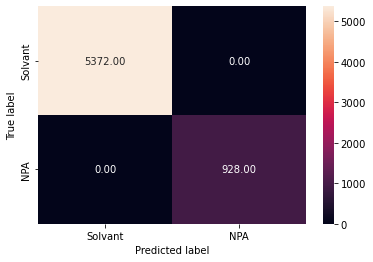

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5372
           1       1.00      1.00      1.00       928

    accuracy                           1.00      6300
   macro avg       1.00      1.00      1.00      6300
weighted avg       1.00      1.00      1.00      6300



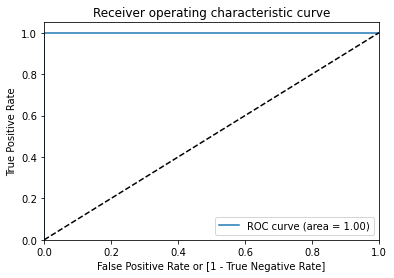

(array([0., 0., 1.]), array([0., 1., 1.]), array([2, 1, 0]))

In [28]:
actual    =  y_train
predicted =  Train_y_pred_CART
print("\nTraining data\n\n")
draw_cm( actual, predicted)
draw_roc(actual, predicted)



Test data




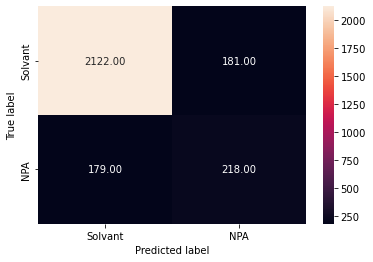

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      2303
           1       0.55      0.55      0.55       397

    accuracy                           0.87      2700
   macro avg       0.73      0.74      0.73      2700
weighted avg       0.87      0.87      0.87      2700



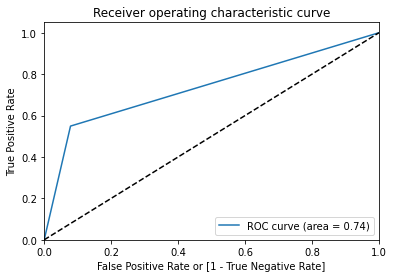

(array([0.        , 0.07859314, 1.        ]),
 array([0.        , 0.54911839, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [29]:
actual    =  y_test
predicted =  Test_y_pred_CART
print("\nTest data\n\n")
draw_cm( actual, predicted)
draw_roc(actual, predicted)

### Creating the classifier object for Random Forest

In [30]:
clf_RF = RandomForestClassifier() 

In [31]:
print("\n\nDefault parameters used for this building this Random Forest model\n\n")
clf_RF.get_params()



Default parameters used for this building this Random Forest model




{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [32]:
clf_RF.fit(X_train_, y_train)

RandomForestClassifier()

In [33]:
Train_y_pred_RF     =    clf_RF.predict(X_train_).tolist()
Test_y_pred_rf      =    clf_RF.predict(X_test_).tolist()


Training data for Random Forest




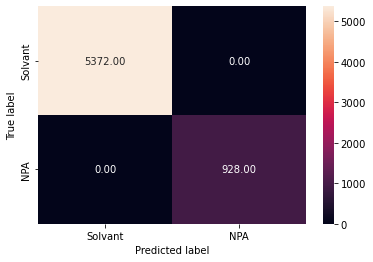

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5372
           1       1.00      1.00      1.00       928

    accuracy                           1.00      6300
   macro avg       1.00      1.00      1.00      6300
weighted avg       1.00      1.00      1.00      6300



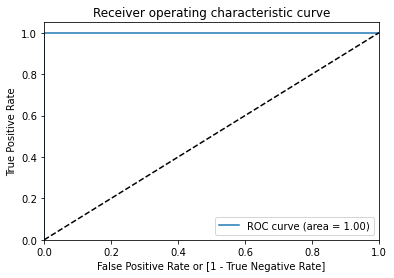

(array([0., 0., 1.]), array([0., 1., 1.]), array([2, 1, 0]))

In [34]:
actual    =  y_train
predicted =  Train_y_pred_RF
print("\nTraining data for Random Forest\n\n")
draw_cm( actual, predicted)
draw_roc(actual, predicted)


Test data for Random Forest 




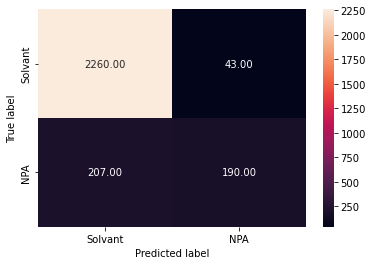

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      2303
           1       0.82      0.48      0.60       397

    accuracy                           0.91      2700
   macro avg       0.87      0.73      0.78      2700
weighted avg       0.90      0.91      0.90      2700



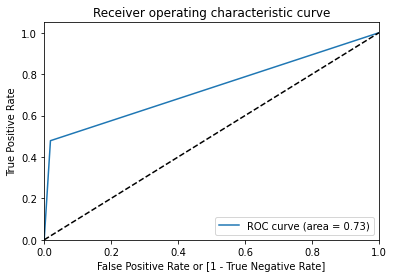

(array([0.       , 0.0186713, 1.       ]),
 array([0.        , 0.47858942, 1.        ]),
 array([2, 1, 0]))

In [35]:
actual    =  y_test
predicted =  Test_y_pred_rf
print("\nTest data for Random Forest \n\n")
draw_cm( actual, predicted)
draw_roc(actual, predicted)

### Creating the classifier object for XGBoost

In [36]:
clf_XGB     =    XGBClassifier() 

In [37]:
print("\n\nDefault parameters used for this building this XGBoost model\n\n")
clf_XGB.get_params()



Default parameters used for this building this XGBoost model




{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [38]:
clf_XGB.fit(X_train_, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [39]:
Train_y_pred_XGB          =    clf_XGB.predict(X_train_).tolist()
Test_y_pred_XGB           =    clf_XGB.predict(X_test_).tolist()


Training data for XGBoost model




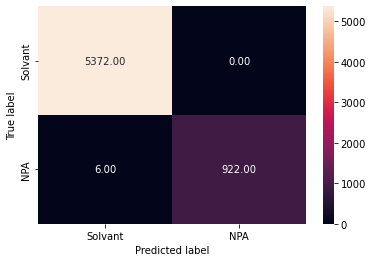

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5372
           1       1.00      0.99      1.00       928

    accuracy                           1.00      6300
   macro avg       1.00      1.00      1.00      6300
weighted avg       1.00      1.00      1.00      6300



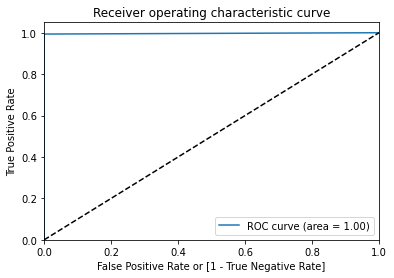

(array([0., 0., 1.]),
 array([0.        , 0.99353448, 1.        ]),
 array([2, 1, 0]))

In [40]:
actual    =  y_train
predicted =  Train_y_pred_XGB
print("\nTraining data for XGBoost model\n\n")
draw_cm( actual, predicted)
draw_roc(actual, predicted)



Test data for XGBoost Model




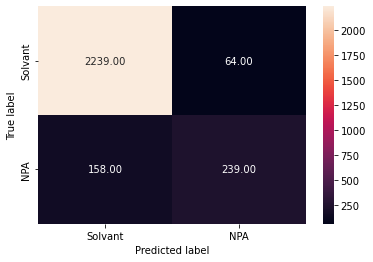

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2303
           1       0.79      0.60      0.68       397

    accuracy                           0.92      2700
   macro avg       0.86      0.79      0.82      2700
weighted avg       0.91      0.92      0.91      2700



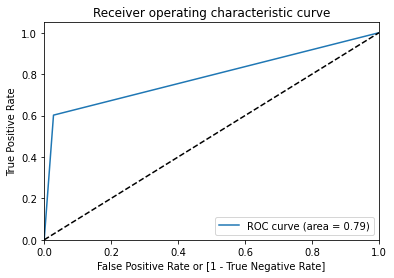

(array([0.        , 0.02778984, 1.        ]),
 array([0.        , 0.60201511, 1.        ]),
 array([2, 1, 0]))

In [41]:
actual    =  y_test
predicted =  Test_y_pred_XGB
print("\nTest data for XGBoost Model\n\n")
draw_cm( actual, predicted)
draw_roc(actual, predicted)

### Conensus model using Training data

In [42]:
list_tr                         =   ['CART', 'RF', 'XGB']
df_tr_C                         =   pd.DataFrame({'CART' : Train_y_pred_CART, \
                                                  'RF' : Train_y_pred_RF,\
                                                  'XGB' : Train_y_pred_XGB})
Train_y_pred_Consensus          =   df_tr_C[list_tr].mode(axis = 1)

In [43]:
df_te_C                         =   pd.DataFrame({'CART' : Test_y_pred_CART, \
                                                  'RF' : Test_y_pred_rf,\
                                                  'XGB' : Test_y_pred_XGB})
Test_y_pred_Consensus           =   df_te_C[list_tr].mode(axis = 1)


Training data for Consensus model




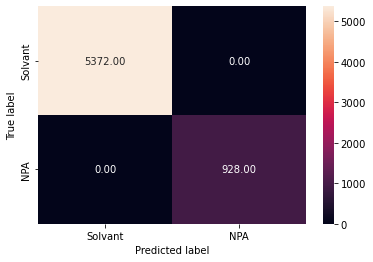

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5372
           1       1.00      1.00      1.00       928

    accuracy                           1.00      6300
   macro avg       1.00      1.00      1.00      6300
weighted avg       1.00      1.00      1.00      6300



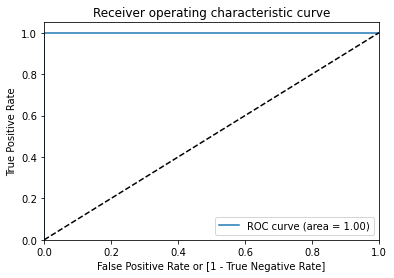

(array([0., 0., 1.]), array([0., 1., 1.]), array([2, 1, 0], dtype=int64))

In [44]:
actual    =  y_train
predicted =  Train_y_pred_Consensus
print("\nTraining data for Consensus model\n\n")
draw_cm( actual, predicted)
draw_roc(actual, predicted)



Test data for Consensus Model




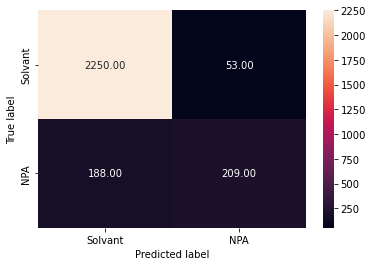

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      2303
           1       0.80      0.53      0.63       397

    accuracy                           0.91      2700
   macro avg       0.86      0.75      0.79      2700
weighted avg       0.90      0.91      0.90      2700



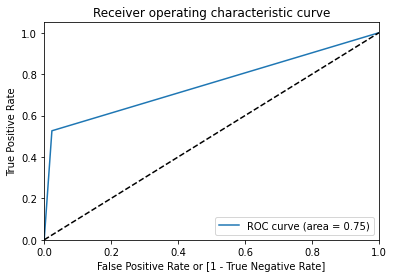

(array([0.        , 0.02301346, 1.        ]),
 array([0.        , 0.52644836, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [45]:
actual    =  y_test
predicted =  Test_y_pred_Consensus
print("\nTest data for Consensus Model\n\n")
draw_cm( actual, predicted)
draw_roc(actual, predicted)

### Variable importance Plots

### Decision Tree (CART) model

<function matplotlib.pyplot.show(close=None, block=None)>

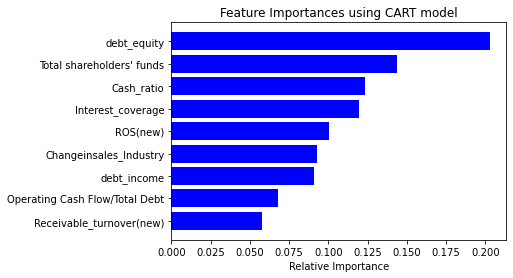

In [46]:
importances                 =   clf_gini.feature_importances_
indices                     =   np.argsort(importances)
feature_names               =   X_train_.columns

plt.title('Feature Importances using CART model')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show

In [47]:
idf =  pd.DataFrame({'Name' : [feature_names[i] for i in indices], 'Value' : importances[indices] *100 })
idf.sort_values('Value', ascending = False, inplace = True)
idf.set_index(keys = 'Name', inplace = True)
print("\nFeature importance - Decision Tree (CART) Model")
print(idf)


Feature importance - Decision Tree (CART) Model
                                    Value
Name                                     
debt_equity                     20.306453
Total shareholders' funds       14.398662
Cash_ratio                      12.351200
Interest_coverage               11.978954
ROS(new)                        10.049466
Changeinsales_Industry           9.301549
debt_income                      9.061490
Operating Cash Flow/Total Debt   6.767873
Receivable_turnover(new)         5.784353


### Random Forest Model

<function matplotlib.pyplot.show(close=None, block=None)>

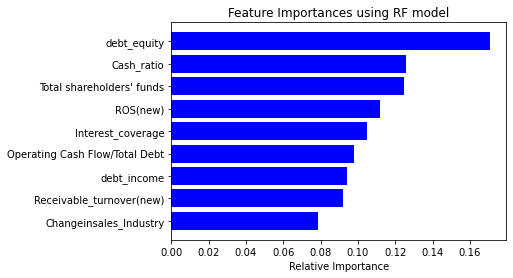

In [48]:
importances                 =   clf_RF.feature_importances_
indices                     =   np.argsort(importances)
feature_names               =   X_train_.columns

plt.title('Feature Importances using RF model')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show

In [49]:
idf =  pd.DataFrame({'Name' : [feature_names[i] for i in indices], 'Value' : importances[indices] *100 })
idf.sort_values('Value', ascending = False, inplace = True)
idf.set_index(keys = 'Name', inplace = True)
print("\nFeature importance - Random Forest Model")
print(idf)


Feature importance - Random Forest Model
                                    Value
Name                                     
debt_equity                     17.079967
Cash_ratio                      12.562455
Total shareholders' funds       12.467915
ROS(new)                        11.188167
Interest_coverage               10.498491
Operating Cash Flow/Total Debt   9.767727
debt_income                      9.384015
Receivable_turnover(new)         9.184704
Changeinsales_Industry           7.866558


<function matplotlib.pyplot.show(close=None, block=None)>

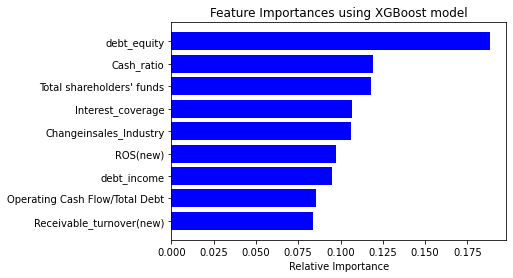

In [50]:
importances                 =   clf_XGB.feature_importances_
indices                     =   np.argsort(importances)
feature_names               =   X_train_.columns

plt.title('Feature Importances using XGBoost model')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show

In [51]:
idf =  pd.DataFrame({'Name' : [feature_names[i] for i in indices], 'Value' : importances[indices] *100 })
idf.sort_values('Value', ascending = False, inplace = True)
idf.set_index(keys = 'Name', inplace = True)
print("\nFeature importance - XGBoost Model")
print(idf)


Feature importance - XGBoost Model
                                    Value
Name                                     
debt_equity                     18.846859
Cash_ratio                      11.907918
Total shareholders' funds       11.773545
Interest_coverage               10.666280
Changeinsales_Industry          10.599430
ROS(new)                         9.717816
debt_income                      9.524230
Operating Cash Flow/Total Debt   8.569994
Receivable_turnover(new)         8.393931


In [52]:
df_train_data       =   X_train.copy()


In [53]:
df_train_data['Target']                   =  y_train
df_train_data['y_train_pred_CART']        =  Train_y_pred_CART
df_train_data['y_train_pred_RF']          =  Train_y_pred_RF
df_train_data['y_train_pred_XGB']         =  Train_y_pred_XGB
df_train_data['y_train_pred_Consensus']   =  Train_y_pred_Consensus
print(df_train_data.columns)

Index(['Cash_ratio', 'Changeinsales_Industry', 'debt_equity', 'debt_income',
       'Interest_coverage', 'Operating Cash Flow/Total Debt',
       'Receivable_turnover(new)', 'ROS(new)', 'Total shareholders' funds',
       'Slno', 'Shareholderquity_code', 'Target', 'y_train_pred_CART',
       'y_train_pred_RF', 'y_train_pred_XGB', 'y_train_pred_Consensus'],
      dtype='object')


In [54]:
df_test_data                              =    X_test.copy()
df_test_data['Target']                    =    y_test
df_test_data['y_test_pred_CART']          =    Test_y_pred_CART
df_test_data['y_test_pred_RF']            =    Test_y_pred_rf
df_test_data['y_test_pred_XGB']           =    Test_y_pred_XGB
df_test_data['y_test_pred_Consensus']     =    Test_y_pred_Consensus
print(df_test_data.columns)

Index(['Cash_ratio', 'Changeinsales_Industry', 'debt_equity', 'debt_income',
       'Interest_coverage', 'Operating Cash Flow/Total Debt',
       'Receivable_turnover(new)', 'ROS(new)', 'Total shareholders' funds',
       'Slno', 'Shareholderquity_code', 'Target', 'y_test_pred_CART',
       'y_test_pred_RF', 'y_test_pred_XGB', 'y_test_pred_Consensus'],
      dtype='object')


### Write final train and test files

In [55]:
# Parent Directory path
parent_dir = r'D:\DrPKV\20220901'
os.chdir(parent_dir)

In [56]:
path   =    parent_dir + r'\Output_' + datetime.now().strftime("%Y%m%d%I%M%S%p")
print(path)
os.mkdir(path)

D:\DrPKV\20220901\Output_20220901041153PM


In [57]:
filename_tr        =   path +   r'\train_' + datetime.now().strftime("%Y%m%d%I%M%S%p") + '.csv'
df_train_data.to_csv(filename_tr, index = False)

In [58]:
filename_te        =  path +   r'\test_' + datetime.now().strftime("%Y%m%d%I%M%S%p") + '.csv'
df_test_data.to_csv(filename_te, index = False)

### END